In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [98]:
df = pd.read_csv('Data/coin_Bitcoin.csv')
df = df.drop(['SNo'], axis = 1)
df = df.drop(['Name'], axis = 1)
df = df.drop(['Symbol'], axis = 1)
df['Date'] = df['Date'].str[:10]
df

,Date,High,Low,Open,Close,Volume,Marketcap
0,2013-04-29,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2013-04-30,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,2013-05-01,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,2013-05-02,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,2013-05-03,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...
2986,2021-07-02,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2021-07-03,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2021-07-04,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2021-07-05,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


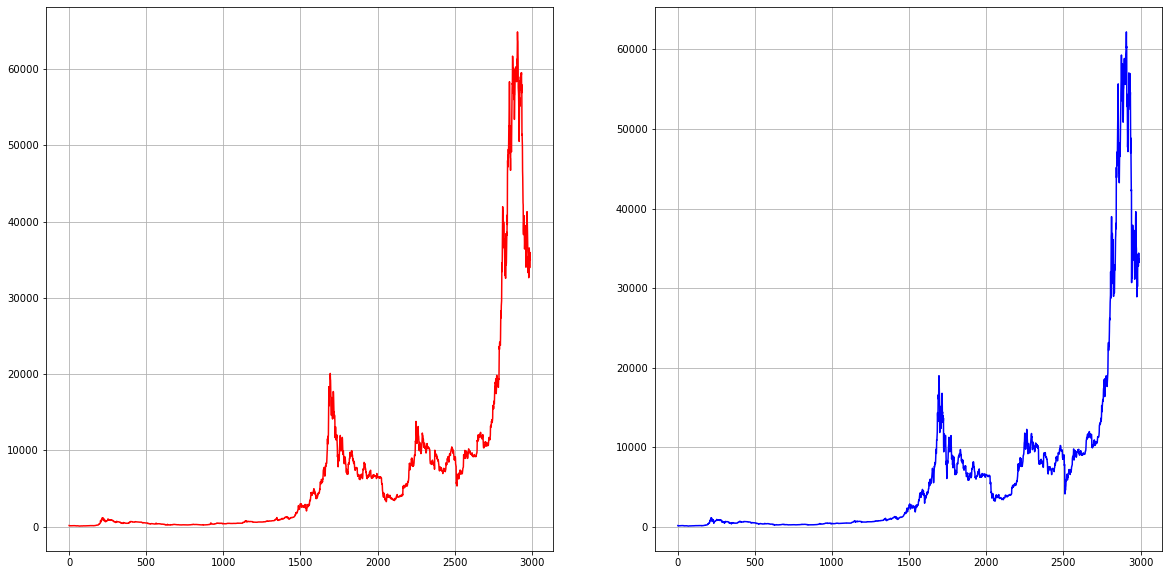

In [105]:
plt.figure(figsize = (20, 10))

plt.subplot(1, 2, 1)
df['High'].plot(color = 'red')
plt.grid()

plt.subplot(1, 2, 2)
df['Low'].plot(color = 'blue')
plt.grid()

plt.show()

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
hh = df[['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']]
hh

,High,Low,Open,Close,Volume,Marketcap
0,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...
2986,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


In [33]:
scaler = MinMaxScaler()
scaler.fit(hh)
hh_s = scaler.transform(hh)
hh_s = pd.DataFrame(hh_s, columns = ('High', 'Low', 'Open', 'Close', 'Volome', 'Marketcap'))
hh_s

,High,Low,Open,Close,Volome,Marketcap
0,0.001126,0.001102,0.001039,0.001200,0.000000,0.000696
1,0.001117,0.001103,0.001190,0.001112,0.000000,0.000645
2,0.001008,0.000679,0.001111,0.000765,0.000000,0.000439
3,0.000788,0.000431,0.000754,0.000580,0.000000,0.000329
4,0.000518,0.000218,0.000595,0.000462,0.000000,0.000259
...,...,...,...,...,...,...
2986,0.522701,0.526285,0.527633,0.533280,0.110349,0.535324
2987,0.537668,0.536455,0.532437,0.545442,0.069476,0.547545
2988,0.553539,0.552447,0.545220,0.555203,0.071016,0.557359
2989,0.543457,0.533413,0.554971,0.530899,0.076137,0.533001


In [34]:
high_prices = df['High'].values
low_prices = df['Low'].values
mid_prices = (high_prices + low_prices) / 2

In [35]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

In [38]:
def normalize_windows(df):
    normalized_data = []
    for window in df:
        normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
        normalized_data.append(normalized_window)
    return np.array(normalized_data)

result = normalize_windows(result)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((2646, 50, 1), (294, 50, 1))

In [82]:
# module import

import datetime

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Activation, Dropout
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Conv1D, MaxPooling1D, LeakyReLU, PReLU, Flatten

In [42]:
# Model

model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (50, 1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(1, activation = 'linear'))

model.compile(loss = 'mse',
             optimizer = 'rmsprop',
             metrics = ['acc'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50, 50)            10400     
                                                                 
 lstm_3 (LSTM)               (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [45]:
# Fitting
start_time = datetime.datetime.now().strftime('%Y_%m_%d_%H_%M_%S')

model.fit(x_train, y_train,
         epochs = 20,
         batch_size = 10,
         callbacks = [TensorBoard(log_dir='logs/%s' % (start_time)),
        ModelCheckpoint('./models/%s_eth.h5' % (start_time), monitor='val_loss', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, mode='auto')])

Epoch 1/20
265/265 [==============================] - 6s 9ms/step - loss: 0.0699 - acc: 0.0000e+00 - lr: 0.0010
Epoch 2/20
265/265 [==============================] - 2s 8ms/step - loss: 0.0209 - acc: 0.0000e+00 - lr: 0.0010
Epoch 3/20
265/265 [==============================] - 2s 8ms/step - loss: 0.0210 - acc: 0.0000e+00 - lr: 0.0010
Epoch 4/20
265/265 [==============================] - 2s 8ms/step - loss: 0.0178 - acc: 0.0000e+00 - lr: 0.0010
Epoch 5/20
265/265 [==============================] - 2s 8ms/step - loss: 0.0162 - acc: 0.0000e+00 - lr: 0.0010
Epoch 6/20
265/265 [==============================] - 2s 8ms/step - loss: 0.0123 - acc: 0.0000e+00 - lr: 0.0010
Epoch 7/20
265/265 [==============================] - 2s 8ms/step - loss: 0.0132 - acc: 0.0000e+00 - lr: 0.0010
Epoch 8/20
265/265 [==============================] - 2s 8ms/step - loss: 0.0122 - acc: 0.0000e+00 - lr: 0.0010
Epoch 9/20
265/265 [==============================] - 2s 8ms/step - loss: 0.0101 - acc: 0.0000e+00 - lr:

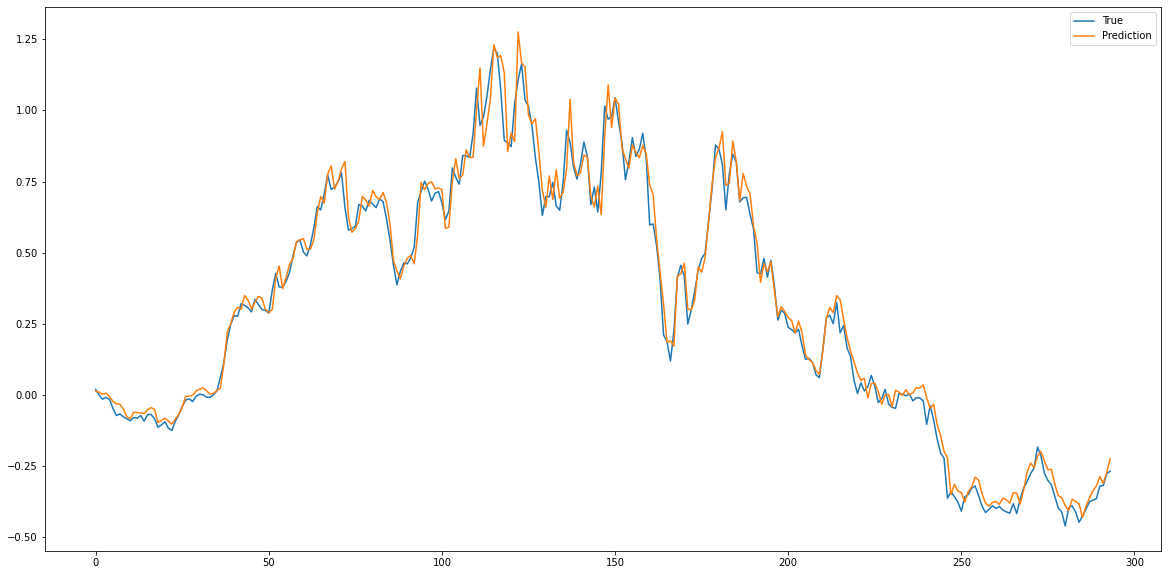

In [46]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()

In [68]:
# Model

model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (50, 1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(10, activation = 'linear'))
model.add(Dense(1, activation = 'linear'))

model.compile(loss = 'mse',
             optimizer = 'rmsprop',
             metrics = ['mae'])

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 50, 50)            10400     
                                                                 
 lstm_25 (LSTM)              (None, 64)                29440     
                                                                 
 dense_13 (Dense)            (None, 10)                650       
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 40,501
Trainable params: 40,501
Non-trainable params: 0
_________________________________________________________________


In [79]:
# Fitting
start_time = datetime.datetime.now().strftime('%Y_%m_%d_%H_%M_%S')

history = model.fit(x_train, y_train,
         epochs = 100,
         batch_size = 10,
         callbacks = [TensorBoard(log_dir='logs/%s' % (start_time)),
        ModelCheckpoint('./models/%s_eth.h5' % (start_time), monitor='val_loss', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, mode='auto')])

Epoch 1/100
265/265 [==============================] - 3s 10ms/step - loss: 0.0039 - mae: 0.0309 - lr: 0.0010
Epoch 2/100
265/265 [==============================] - 2s 9ms/step - loss: 0.0055 - mae: 0.0321 - lr: 0.0010
Epoch 3/100
265/265 [==============================] - 2s 9ms/step - loss: 0.0042 - mae: 0.0307 - lr: 0.0010
Epoch 4/100
265/265 [==============================] - 2s 9ms/step - loss: 0.0048 - mae: 0.0314 - lr: 0.0010
Epoch 5/100
265/265 [==============================] - 2s 9ms/step - loss: 0.0034 - mae: 0.0300 - lr: 0.0010
Epoch 6/100
265/265 [==============================] - 2s 9ms/step - loss: 0.0038 - mae: 0.0305 - lr: 0.0010
Epoch 7/100
265/265 [==============================] - 2s 9ms/step - loss: 0.0040 - mae: 0.0306 - lr: 0.0010
Epoch 8/100
265/265 [==============================] - 2s 9ms/step - loss: 0.0040 - mae: 0.0303 - lr: 0.0010
Epoch 9/100
265/265 [==============================] - 2s 9ms/step - loss: 0.0038 - mae: 0.0308 - lr: 0.0010
Epoch 10/100
265/2

265/265 [==============================] - 2s 9ms/step - loss: 0.0033 - mae: 0.0294 - lr: 0.0010
Epoch 42/100
265/265 [==============================] - 2s 9ms/step - loss: 0.0030 - mae: 0.0292 - lr: 0.0010
Epoch 43/100
265/265 [==============================] - 2s 9ms/step - loss: 0.0032 - mae: 0.0299 - lr: 0.0010
Epoch 44/100
265/265 [==============================] - 2s 9ms/step - loss: 0.0035 - mae: 0.0300 - lr: 0.0010
Epoch 45/100
265/265 [==============================] - 2s 9ms/step - loss: 0.0030 - mae: 0.0297 - lr: 0.0010
Epoch 46/100
265/265 [==============================] - 2s 9ms/step - loss: 0.0038 - mae: 0.0304 - lr: 0.0010
Epoch 47/100
265/265 [==============================] - 2s 9ms/step - loss: 0.0048 - mae: 0.0305 - lr: 0.0010
Epoch 48/100
265/265 [==============================] - 2s 9ms/step - loss: 0.0038 - mae: 0.0301 - lr: 0.0010
Epoch 49/100
265/265 [==============================] - 2s 9ms/step - loss: 0.0031 - mae: 0.0294 - lr: 0.0010
Epoch 50/100
265/265 [=

265/265 [==============================] - 2s 9ms/step - loss: 0.0032 - mae: 0.0293 - lr: 0.0010
Epoch 82/100
265/265 [==============================] - 2s 9ms/step - loss: 0.0029 - mae: 0.0290 - lr: 0.0010
Epoch 83/100
265/265 [==============================] - 2s 9ms/step - loss: 0.0029 - mae: 0.0293 - lr: 0.0010
Epoch 84/100
265/265 [==============================] - 2s 9ms/step - loss: 0.0035 - mae: 0.0296 - lr: 0.0010
Epoch 85/100
265/265 [==============================] - 2s 9ms/step - loss: 0.0024 - mae: 0.0291 - lr: 0.0010
Epoch 86/100
265/265 [==============================] - 2s 9ms/step - loss: 0.0035 - mae: 0.0301 - lr: 0.0010
Epoch 87/100
265/265 [==============================] - 2s 9ms/step - loss: 0.0029 - mae: 0.0294 - lr: 0.0010
Epoch 88/100
265/265 [==============================] - 2s 9ms/step - loss: 0.0029 - mae: 0.0291 - lr: 0.0010
Epoch 89/100
265/265 [==============================] - 2s 9ms/step - loss: 0.0030 - mae: 0.0297 - lr: 0.0010
Epoch 90/100
265/265 [=

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49]

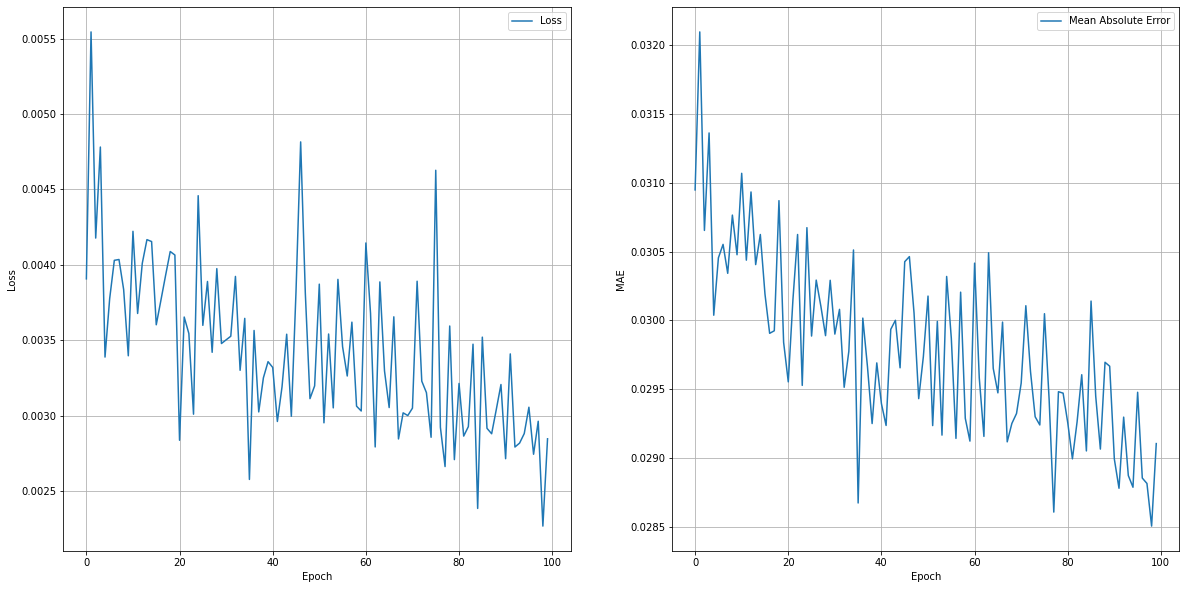

In [80]:
plt.figure(figsize = (20, 10))

plt.subplot(1, 2, 1)
plt.plot(history.epoch, history.history['loss'], label = 'Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.epoch, history.history['mae'], label = 'Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.grid()
plt.legend()

plt.show()

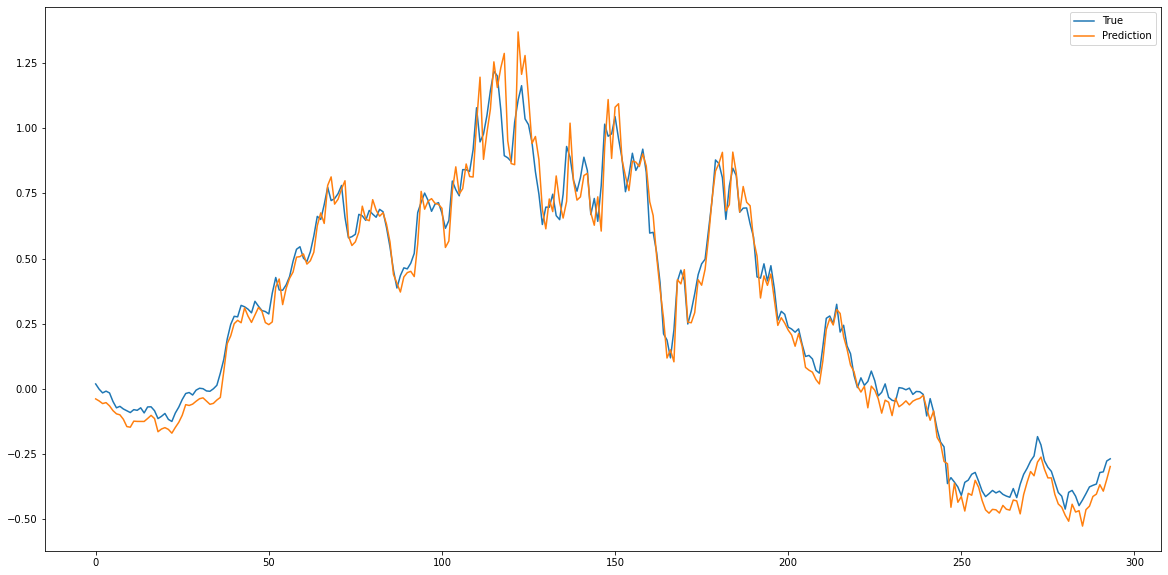

In [81]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()